In [8]:
from sklearn import datasets

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [19]:
cancer=datasets.load_breast_cancer()

In [20]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [24]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [25]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
Y=cancer.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
X_new=pd.DataFrame(X['worst concavity'])

In [33]:
X_new

,worst concavity
0,0.71190
1,0.24160
2,0.45040
3,0.68690
4,0.40000
5,0.53550
6,0.37840
7,0.26780
8,0.53900
9,1.10500


(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

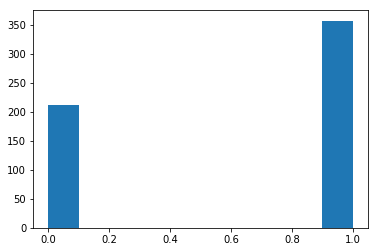

In [34]:
plt.hist(Y)

In [35]:
model =LinearRegression()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.6,random_state=7)
x_train

,worst concavity
296,0.02884
160,0.19560
11,0.39650
144,0.09755
437,0.11170
127,0.32070
387,0.10910
302,0.49320
9,1.10500
476,0.25120


In [39]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
y_pred=model.predict(x_test)

In [42]:
y_pred

array([ 0.9495489 ,  0.20186961,  0.7835703 ,  0.96170921,  0.89266688,
        0.62845012,  0.63482113,  0.5285915 ,  0.36793131,  0.76736578,
        0.29563423,  0.47111393,  0.54936653,  0.97781678,  0.68135718,
        0.57498906,  0.88185002,  0.80102132,  0.1054735 ,  0.523467  ,
        0.34660229,  0.50241497,  0.09480899,  0.55961554,  0.59479458,
        0.67013867,  0.04037842,  0.7794153 ,  0.8622384 ,  0.40532636,
        0.96075356,  0.77512179,  0.35338879,  0.68565069,  0.72373823,
        0.61958611,  0.72207623,  0.91524241,  0.93472938,  0.94161284,
        0.9054366 ,  0.99173605,  0.62180211,  0.74811426,  0.14231454,
        0.84631088,  0.96335737,  0.7810773 ,  0.76888929,  0.34992629,
        0.65753515,  0.57734356, -0.62871587, -0.03815117,  0.04854993,
        0.37887282,  0.76861229,  0.92358012,  0.30532924,  0.57332705,
        0.31363925,  0.18428009,  0.76972029,  0.93101758,  0.63592913,
        0.12167802,  0.87241816,  0.46626643,  0.8660333 ,  0.95

In [43]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

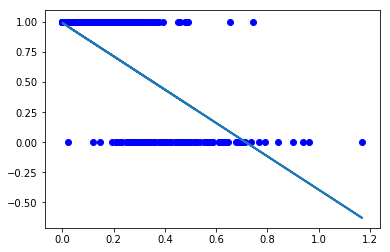

In [49]:
plt.scatter(x_test['worst concavity'],y_test,color='blue')

plt.plot(x_test['worst concavity'],y_pred,linewidth=2)
plt.show()

In [52]:
model.coef_

array([-1.38500164])

In [53]:
model.intercept_

0.9917360497101723

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.6,random_state=7)

In [56]:
mul_model=LinearRegression()

In [57]:
mul_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
Y_pred=mul_model.predict(X_test)
Y_pred

array([ 0.88590524, -0.0700077 ,  0.80981652,  0.99935561,  0.66919655,
        0.22739146,  0.92442791,  0.97469045,  0.23701681,  1.05718593,
        0.35755582,  0.17998168,  0.47314696,  1.22653223,  0.69888371,
        0.62077391,  0.87760592,  0.57998151,  0.08255114,  0.21372542,
       -0.1237345 ,  0.05217418, -0.30214744,  0.72578986,  0.6396521 ,
        0.59532837, -0.42617657,  0.77852753,  1.03916911,  0.62494617,
        0.98012378,  0.91966149,  0.99535129,  0.48201993,  0.6811966 ,
        0.0658337 ,  0.62765785,  0.9160623 ,  1.13326134,  0.94053064,
        0.81463004,  1.36462017,  0.59749947,  0.90454561,  0.01980593,
        0.91514015,  1.03114507,  0.82136366,  0.70391626,  0.00646742,
        0.79005041,  0.45557764,  0.05856603,  0.7352384 , -0.23568957,
        0.17227334,  0.62234687,  0.93547219,  0.33087638,  1.16201795,
        0.75290398,  0.23011921,  0.96453185,  1.15470236,  0.80447407,
        0.33734671,  1.10229792, -0.2542926 ,  0.77133807,  1.03

In [63]:
Y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [72]:
mul_model.score(X_train,Y_train)

0.8031448787870423

In [77]:
Y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [78]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,0.1671,0.05731,...,13.280,19.74,83.61,542.5,0.09958,0.06476,0.030460,0.042620,0.2731,0.06825
259,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,...,18.490,49.54,126.30,1035.0,0.18830,0.55640,0.570300,0.201400,0.3512,0.12040
115,11.930,21.53,76.53,438.6,0.09768,0.07849,0.033280,0.020080,0.1688,0.06194,...,13.670,26.15,87.54,583.0,0.15000,0.23990,0.150300,0.072470,0.2438,0.08541
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.021680,0.025790,0.3557,0.08020
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,...,12.400,18.99,79.46,472.4,0.13590,0.08368,0.071530,0.089460,0.2220,0.06033
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,0.06310,...,20.600,24.13,135.10,1321.0,0.12800,0.22970,0.262300,0.132500,0.3021,0.07987
221,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,0.06303,...,14.980,17.13,101.10,686.6,0.13760,0.26980,0.257700,0.090900,0.3065,0.08177
284,12.890,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.033900,0.1432,0.05935,...,13.900,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127
146,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.074150,0.2678,0.07371,...,13.740,26.38,91.93,591.7,0.13850,0.40920,0.450400,0.186500,0.5774,0.10300
480,12.160,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.015270,0.1464,0.06284,...,13.340,27.87,88.83,547.4,0.12080,0.22790,0.162000,0.056900,0.2406,0.07729


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

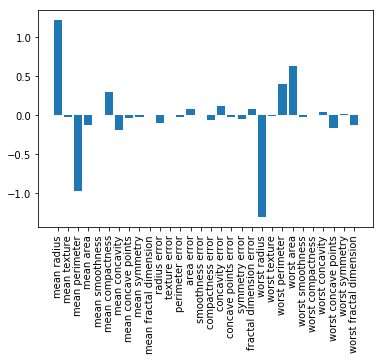

In [125]:
plt.bar(cancer.feature_names,mul_model.coef_)
plt.xticks(rotation=90)

In [83]:
scaler=StandardScaler()

In [85]:
mul_model=LinearRegression()

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.6,random_state=7)

In [103]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
296,10.910,12.35,69.14,363.7,0.08518,0.04721,0.012360,0.013690,0.1449,0.06031,...,11.370,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.037380,0.1993,0.06453,...,13.320,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987
11,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,0.06082,...,20.420,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480
144,10.750,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
437,14.040,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.029440,0.1714,0.05898,...,15.660,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
127,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,0.1946,0.05044,...,22.320,25.73,148.20,1538.0,0.10210,0.22640,0.32070,0.12180,0.2841,0.06541
387,13.880,16.16,88.37,596.6,0.07026,0.04831,0.020450,0.008507,0.1607,0.05474,...,15.510,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,0.2249,0.07469,...,23.680,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,16.450,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [101]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [102]:
X_train_scaled

array([[-0.9506959 , -1.63500979, -0.9797486 , ..., -1.3222654 ,
        -1.27618277, -0.97455256],
       [-0.72154942,  0.25443714, -0.70372981, ..., -0.60916021,
         0.40017061, -0.25778723],
       [ 0.37780808, -0.29815973,  0.38686167, ...,  0.93214519,
         1.42070184,  1.07174844],
       ...,
       [-0.73791703,  1.28241211, -0.69302218, ...,  0.17291124,
        -0.19677474,  0.7997616 ],
       [-0.17050671,  0.76359845, -0.12750093, ...,  0.72494389,
         0.25624954,  0.4600447 ],
       [-1.56148037, -1.12826157, -1.56351247, ..., -1.80533178,
        -0.54185822, -0.33191698]])

In [89]:
mul_model.fit(X_train_scaled,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
Y_pred=mul_model.predict(X_test_scaled)
Y_pred

array([ 0.88590524, -0.0700077 ,  0.80981652,  0.99935561,  0.66919655,
        0.22739146,  0.92442791,  0.97469045,  0.23701681,  1.05718593,
        0.35755582,  0.17998168,  0.47314696,  1.22653223,  0.69888371,
        0.62077391,  0.87760592,  0.57998151,  0.08255114,  0.21372542,
       -0.1237345 ,  0.05217418, -0.30214744,  0.72578986,  0.6396521 ,
        0.59532837, -0.42617657,  0.77852753,  1.03916911,  0.62494617,
        0.98012378,  0.91966149,  0.99535129,  0.48201993,  0.6811966 ,
        0.0658337 ,  0.62765785,  0.9160623 ,  1.13326134,  0.94053064,
        0.81463004,  1.36462017,  0.59749947,  0.90454561,  0.01980593,
        0.91514015,  1.03114507,  0.82136366,  0.70391626,  0.00646742,
        0.79005041,  0.45557764,  0.05856603,  0.7352384 , -0.23568957,
        0.17227334,  0.62234687,  0.93547219,  0.33087638,  1.16201795,
        0.75290398,  0.23011921,  0.96453185,  1.15470236,  0.80447407,
        0.33734671,  1.10229792, -0.2542926 ,  0.77133807,  1.03

In [92]:
Y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [95]:
mul_model.score(X_train_scaled,Y_train)

0.8031448787870424

In [97]:
mul_model.score(X_test_scaled,Y_test)

0.7250568196163343

In [99]:
mul_model.coef_

array([ 1.22431171e+00, -2.52934333e-02, -9.79235622e-01, -1.28175375e-01,
       -1.58741812e-04,  2.94064018e-01, -1.88385732e-01, -3.74979228e-02,
       -2.52446143e-02,  4.06221261e-03, -1.07628495e-01, -1.76579902e-03,
       -2.81094923e-02,  7.25607320e-02,  4.32278252e-04, -6.74821284e-02,
        1.18354827e-01, -2.53405039e-02, -5.66677758e-02,  7.95747181e-02,
       -1.31529000e+00, -1.93807818e-02,  4.00041759e-01,  6.27680434e-01,
       -3.16276133e-02,  5.00954792e-03,  3.35291737e-02, -1.68495200e-01,
        6.89094785e-03, -1.35524427e-01])

In [100]:
mul_model.intercept_

0.5903083700440547

In [104]:
model_ridge=Ridge(alpha=0.00001)
model_ridge.fit(X_train_scaled,Y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
Y_ridge=model_ridge.predict(X_test_scaled)
Y_ridge

array([ 0.88591126, -0.07000234,  0.80981842,  0.99935213,  0.66918399,
        0.22737676,  0.92442234,  0.97469637,  0.23703436,  1.05718176,
        0.35755906,  0.17999231,  0.47315321,  1.22652987,  0.69887799,
        0.62077418,  0.87759781,  0.57999023,  0.08255309,  0.21373783,
       -0.1237373 ,  0.05217863, -0.30216281,  0.72578154,  0.6396511 ,
        0.59533814, -0.4261866 ,  0.77852745,  1.03916786,  0.62493972,
        0.98011568,  0.91966296,  0.99531404,  0.48201139,  0.68118555,
        0.06583196,  0.62766322,  0.91605714,  1.13326602,  0.94053123,
        0.8146287 ,  1.36461707,  0.59750931,  0.90454416,  0.01978611,
        0.91513348,  1.03114966,  0.82136239,  0.70392322,  0.00647409,
        0.79005157,  0.45558241,  0.05855841,  0.73522149, -0.23568084,
        0.17228753,  0.62234851,  0.93546919,  0.33089194,  1.16202007,
        0.75290824,  0.23011675,  0.96452581,  1.15470597,  0.80447599,
        0.3373261 ,  1.10230513, -0.25430754,  0.77134587,  1.03

In [115]:
model_lasso=Lasso(alpha=0.001)
model_lasso.fit(X_train_scaled,Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
Y_lasso=model_lasso.predict(X_test_scaled)
Y_lasso

array([ 0.92088347, -0.05913386,  0.83178793,  0.97159377,  0.61199573,
        0.23788223,  0.89056841,  1.00085491,  0.29542483,  1.0150454 ,
        0.39303265,  0.22581845,  0.47036848,  1.21557767,  0.68457551,
        0.64299966,  0.8444001 ,  0.61732483,  0.06032347,  0.25656   ,
       -0.21644879,  0.11017496, -0.37352435,  0.72399527,  0.6420446 ,
        0.60289412, -0.31848101,  0.78679697,  1.03553208,  0.59982679,
        0.9815396 ,  0.92894839,  0.97384458,  0.45840341,  0.64021023,
        0.07622702,  0.64020853,  0.91171444,  1.16282809,  0.95236579,
        0.80234833,  1.34187644,  0.65076364,  0.91097233, -0.05163408,
        0.88297971,  1.03351879,  0.80748132,  0.7022019 ,  0.0049561 ,
        0.79285224,  0.4519218 , -0.05127151,  0.70824622, -0.1822282 ,
        0.24858015,  0.62290254,  0.94007435,  0.34948338,  1.1493849 ,
        0.78147807,  0.25935671,  0.93764749,  1.15924316,  0.7719678 ,
        0.29730508,  1.10808531, -0.30027662,  0.79909566,  1.03

In [118]:
Y_pred

array([ 0.88590524, -0.0700077 ,  0.80981652,  0.99935561,  0.66919655,
        0.22739146,  0.92442791,  0.97469045,  0.23701681,  1.05718593,
        0.35755582,  0.17998168,  0.47314696,  1.22653223,  0.69888371,
        0.62077391,  0.87760592,  0.57998151,  0.08255114,  0.21372542,
       -0.1237345 ,  0.05217418, -0.30214744,  0.72578986,  0.6396521 ,
        0.59532837, -0.42617657,  0.77852753,  1.03916911,  0.62494617,
        0.98012378,  0.91966149,  0.99535129,  0.48201993,  0.6811966 ,
        0.0658337 ,  0.62765785,  0.9160623 ,  1.13326134,  0.94053064,
        0.81463004,  1.36462017,  0.59749947,  0.90454561,  0.01980593,
        0.91514015,  1.03114507,  0.82136366,  0.70391626,  0.00646742,
        0.79005041,  0.45557764,  0.05856603,  0.7352384 , -0.23568957,
        0.17227334,  0.62234687,  0.93547219,  0.33087638,  1.16201795,
        0.75290398,  0.23011921,  0.96453185,  1.15470236,  0.80447407,
        0.33734671,  1.10229792, -0.2542926 ,  0.77133807,  1.03

In [119]:
Y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

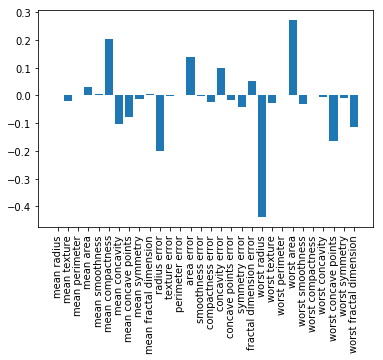

In [122]:
plt.bar(cancer.feature_names,model_lasso.coef_)
plt.xticks(rotation=90)